# Retrieving Data

In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [86]:
dataset = pd.read_csv("NHANES.csv")
dataset.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [87]:
dataset.shape


(5735, 28)

In [88]:
# Isolate the column 
data = dataset.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [90]:
# Change the column names to ease the use
data.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']
data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [91]:
data.shape

(5735, 8)

Result : dataset with 5735 rows and 8 columns. The dataset contains 3 columns with categorical data and 4 column with numerical data.

Categorical = smoking, gender, education

Numerical = age, weight, height, bmi

# Data Cleaning 

Steps I will use in data cleaning :
1. Check for duplicate or unnecessary data
2. Check for null values or missing data
3. Check for outliers

In [92]:
# Checking for duplicates
data[data.duplicated()]

,seqn,smoking,gender,age,education,weight,height,bmi


There is no duplicate data in this dataset, so I will drop the 'seqn' column because every row contains unique data so it doesn't give much explanation about the data.

In [93]:
# Drop seqn column 
data.drop(columns = 'seqn', inplace = True)

In [94]:
data.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


Check for missing values and handle them

In [95]:
data.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

I have missing values in column education, weight, height, and bmi. For education, I think it is better to drop them because filling the missed value might mislead the real data. For weight, height and bmi, I will drop them too because the number of missing values are very small compared to the dataset (>5000 rows).

In [96]:
data.dropna(inplace = True)

In [97]:
data.shape

(5406, 7)

Find outliers and handle outliers


I have three numerical data (weight, height and bmi), so I will try to find outliers from these columns using histogram and boxplot.

In [98]:
# Descriptive Analysis for numerical data

numerical = ['age','weight','height','bmi']
data[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


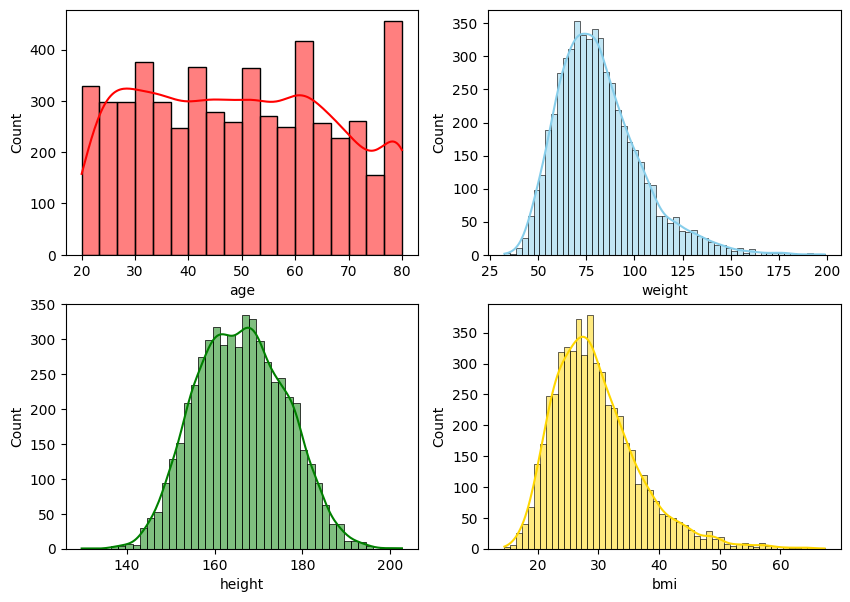

In [99]:
# Create histogram for numerical variable

fig, axs = plt.subplots(2,2, figsize=(10, 7))
sns.histplot(data= data, x="age",kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight",kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height",kde=True, color="green", ax=axs[1,0])
sns.histplot(data= data, x="bmi",kde=True, color="gold", ax=axs[1,1])
plt.show()


From histograms, I observe that height has a normal distribution curve while weight and bmi have a bit of right-skewed distribution.

<Axes: xlabel='bmi'>

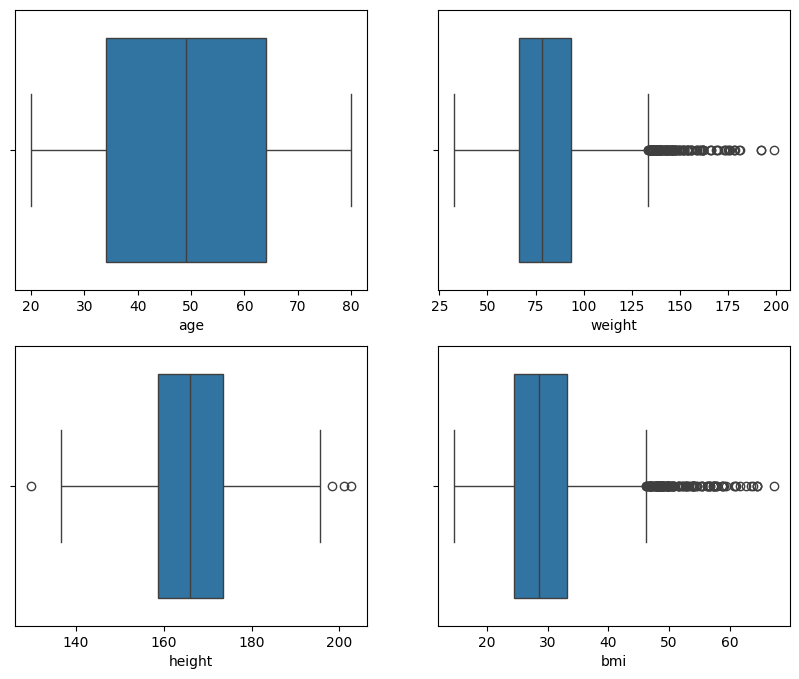

In [100]:
# Create boxplot to observe distribution of numerical value

fig, axs = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x = data['age'], ax = axs[0,0])
sns.boxplot(x = data['weight'], ax = axs[0,1])
sns.boxplot(x = data['height'], ax = axs[1,0])
sns.boxplot(x = data['bmi'], ax = axs[1,1])

According to the boxplots, age variable has no outliers. Height has normal distribution with few outliers. Meanwhile, weight and bmi have more outliers in the upper values.

Based on the observation of histogram and boxplot, I decided the outliers to be outside of minimum and maximum value for height. Meanwhile for weight and BMI, I will consider value more than maximum as outliers.

In [101]:
# IQR method for removing outliers
# 1. Height

qh1 = data['height'].quantile(0.25)
qh3 = data['height'].quantile(0.75)
iqrh = qh3 - qh1
minh = qh1 - 1.5*iqrh
maxh = qh3 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]





In [102]:
# 2. Weight

qw1 = data['weight'].quantile(0.25)
qw3 = data['weight'].quantile(0.75)
iqrw = qw3 - qw1
minw = qw1 - 1.5*iqrw
maxw = qw3 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [103]:
# 3. BMI

qb1 = data['bmi'].quantile(0.25)
qb3 = data['bmi'].quantile(0.75)
iqrb = qb3 - qb1
minb = qb1 - 1.5*iqrb
maxb = qb3 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

In [104]:
data.shape

(5171, 7)

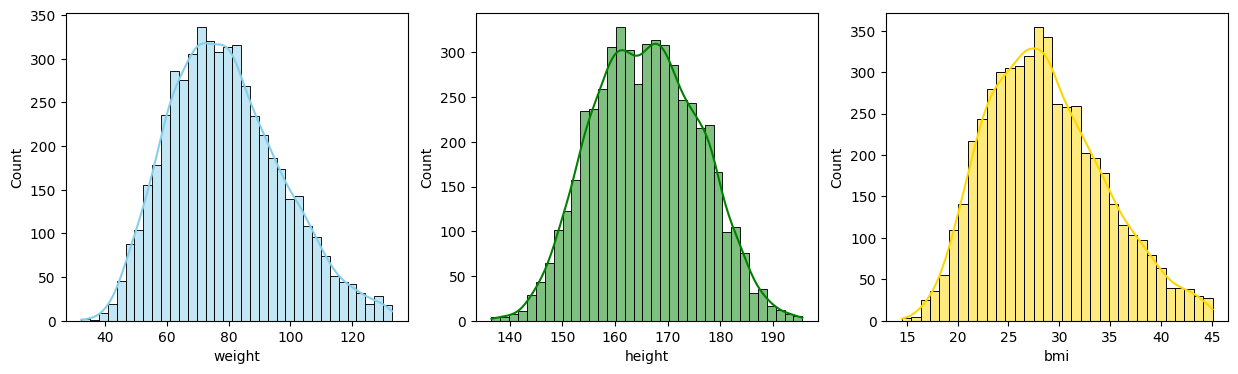

In [105]:
# Check the distribution after removing outliers using histogram

fig, axs = plt.subplots(1,3, figsize=(15, 4))
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="green", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])
plt.show()

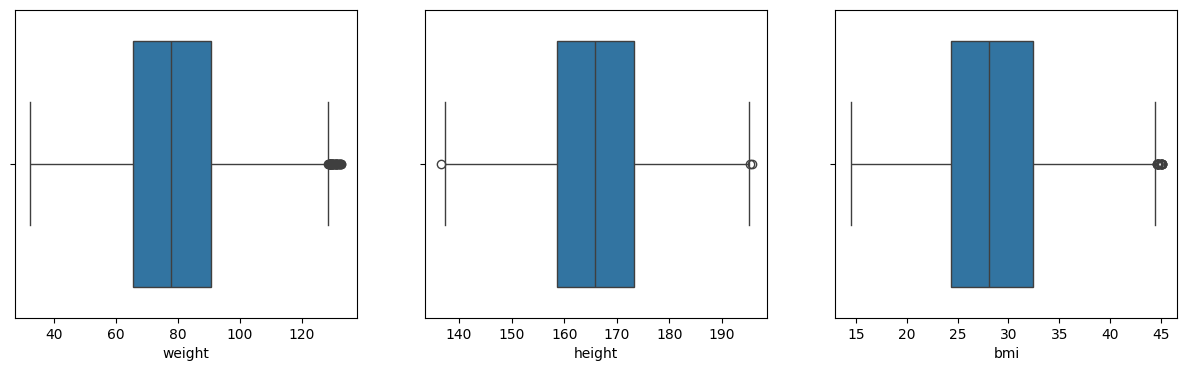

In [106]:
# Check distribution using boxplot after removing outliers

fig, axs = plt.subplots(1,3, figsize=(15, 4))
sns.boxplot(x = data['weight'], ax = axs[0])
sns.boxplot(x = data['height'], ax = axs[1])
sns.boxplot(x = data['bmi'], ax = axs[2])
plt.show()

Result : the numerical values have been removed from outliers, the result is data with normal distribution.

# Feature Engineering

1. One hot encoding for categorical data
2. Log transform of skewed variables
3. Pairplot features

1. One hot encoding for categorical data

   Since the categorical data have been in a type of int or float, I would translate them to object data type to make tho encoding easier.

In [107]:
# smoking
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender
data['gender'] = data['gender'].replace({1 : 'male', 2 : 'female'})

#education
data['education'] = data['education'].replace({1 : '<9th grade', 2 : '9-11th grade', 3 : 'HS or GED', 4 : 'Some college / AA', 5 : 'College or above', 
                                               7 : 'Other', 8 : 'Other'})

In [108]:
# Get the categorical data
categorical = data[['smoking','gender','education']]
categorical.head() 

,smoking,gender,education
0,yes,male,College or above
1,yes,male,HS or GED
2,yes,male,HS or GED
3,no,female,College or above
4,no,female,Some college / AA


In [109]:
# Get dummies for categorical data
dummy = pd.get_dummies(categorical,drop_first = True)
dummy


,smoking_yes,gender_male,education_9-11th grade,education_<9th grade,education_College or above,education_HS or GED,education_Some college / AA
0,True,True,False,False,True,False,False
1,True,True,False,False,False,True,False
2,True,True,False,False,False,True,False
3,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
5730,True,False,False,False,False,True,False
5731,False,True,False,False,True,False,False
5732,True,False,False,False,False,False,True
5733,True,True,False,True,False,False,False


2. Log transform of skewed variables

In [110]:
# Check the skewness of numerical variables

numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

age       0.101806
weight    0.426405
height    0.075205
bmi       0.437321
dtype: float64

In my data, I don't have variable with skew limit more than 0.75

3. Pairplot Feature

I will use pairplot to observe correlation of variables.

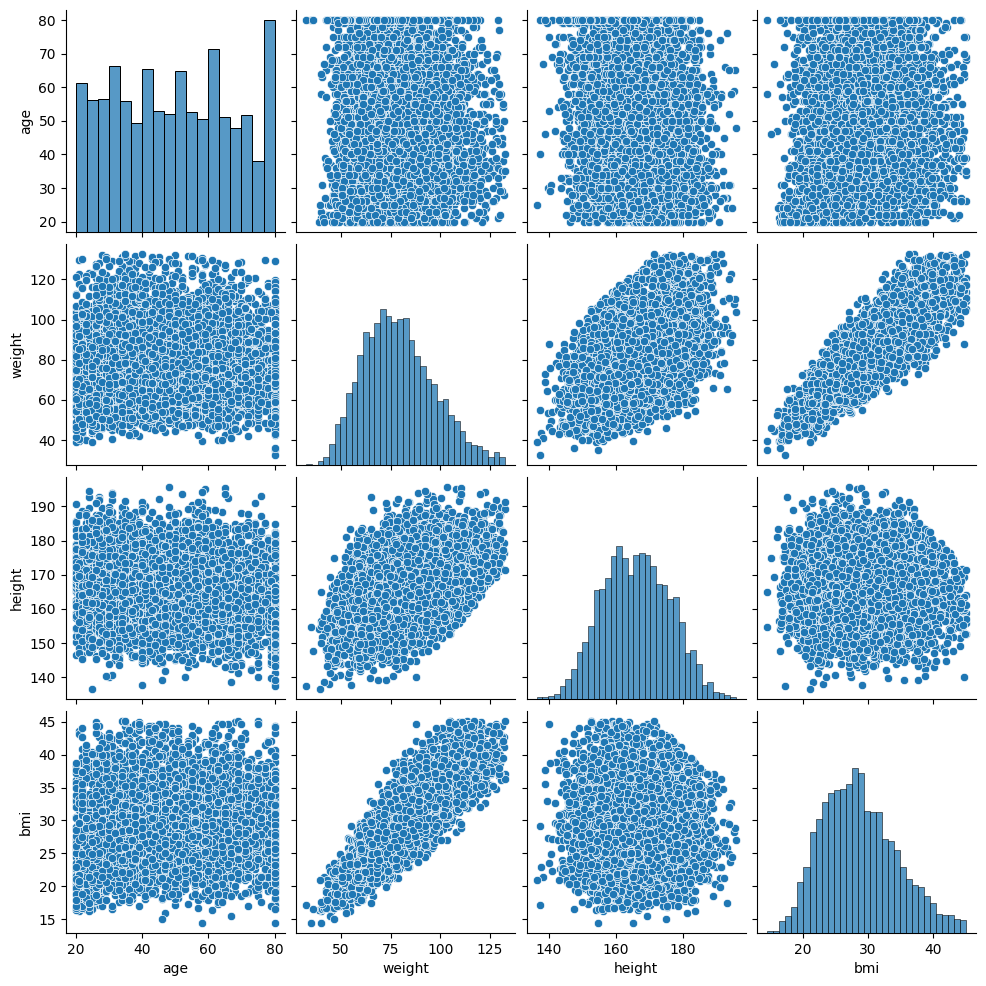

In [111]:
# Pairplot of numerical variables
sns.pairplot(data)


From pairplot above, I observe that weight has a positive correlation with BMI. Height and weight are also slightly positively correlated.

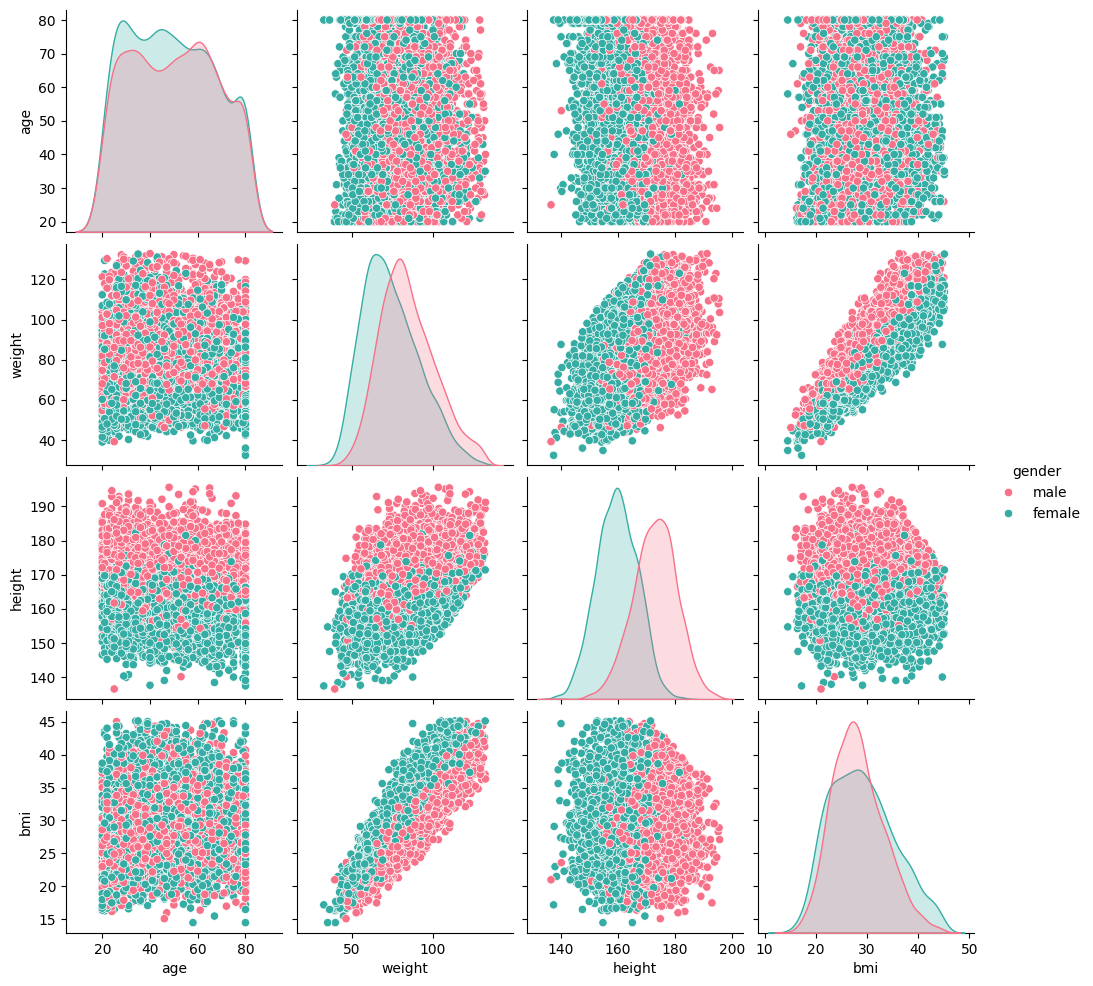

In [112]:
# Pairplot of numerical variables divided by gender

sns.pairplot(data, hue = 'gender',palette = 'husl')

If I look at the pairplot according to gender, I can observe that in all ages, male relatively has higher weight and height distribution but varied in BMI distribution.

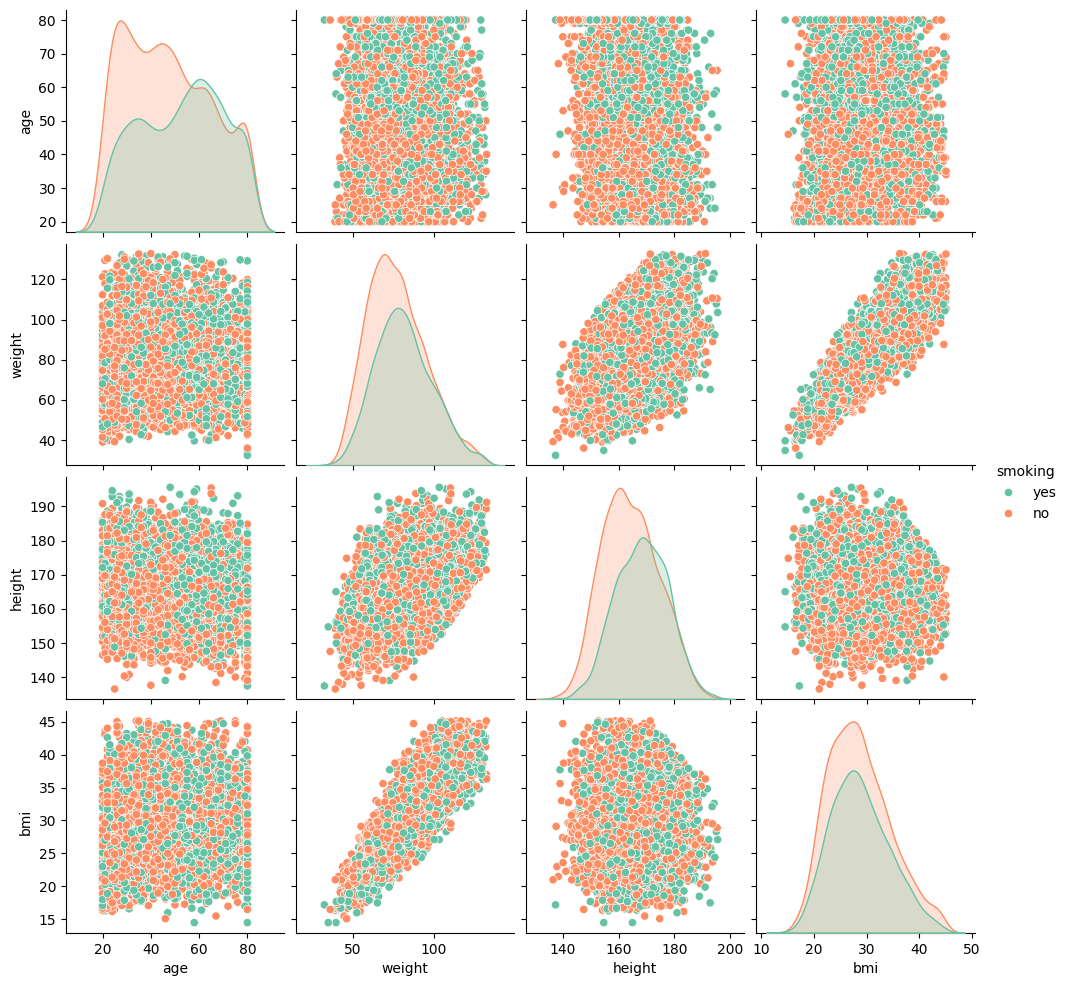

In [113]:
# # Pairplot of numerical variables divided by smoking habit

sns.pairplot(data, hue = 'smoking',palette = 'Set2')

However, according to smoking habit, I see not much difference in distribution of weight, height or bmi in various age.

# Hypothesis Testing

In this section, I will create hypotheses and test them.

1. Create hypotheses
2. Statistical test
3. Conclusion


Before creating a hypotheses, I would like to look at the data first.

In [114]:
# Stratify the age
data['age'] = pd.cut(data.age, [18,30,40,50,60,70,80])

In [115]:
# Group categorical data
data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})
data_cat.columns = ['proportion','size']
data_cat

C:\Users\SNEH\AppData\Local\Temp\ipykernel_4016\2295591951.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})


proportion  size
age      gender                  
(18, 30] female    0.228733   529
         male      0.374439   446
(30, 40] female    0.279279   444
         male      0.502347   426
(40, 50] female    0.255864   469
         male      0.453333   375
(50, 60] female    0.423690   439
         male      0.570439   433
(60, 70] female    0.379808   416
         male      0.648910   413
(70, 80] female    0.326582   395
         male      0.655440   386

In [116]:
# Group numerical data
data_num = data[['gender','age','weight','height','bmi']]
data_num.groupby(['age','gender']).agg(['mean','std'])

C:\Users\SNEH\AppData\Local\Temp\ipykernel_4016\2715677273.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_num.groupby(['age','gender']).agg(['mean','std'])


weight                 height                  bmi  \
                      mean        std        mean       std       mean   
age      gender                                                          
(18, 30] female  71.566163  18.074942  161.403970  6.857818  27.428355   
         male    82.104260  17.384734  174.754036  7.666382  26.861883   
(30, 40] female  75.427703  18.972633  160.685360  7.193215  29.121847   
         male    86.431690  17.075469  173.814554  7.634354  28.570892   
(40, 50] female  76.998081  18.139738  160.221535  7.166239  29.944350   
         male    87.053067  17.650782  173.614933  7.564800  28.786133   
(50, 60] female  75.667882  16.414196  159.913440  6.826822  29.543508   
         male    85.421709  17.061433  172.727714  8.304588  28.549192   
(60, 70] female  75.177404  16.876943  157.921875  6.854032  30.077885   
         male    85.186199  16.773681  171.692978  7.227122  28.805327   
(70, 80] female  70.305063  14.963271  156.220506  6.689105  28.748861   
         male    80.898705  16.168574  170.287824  7.439598  27.794560   

                           
                      std  
age      gender            
(18, 30] female  6.477592  
         male    5.351176  
(30, 40] female  6.642125  
         male    5.093793  
(40, 50] female  6.495185  
         male    5.105766  
(50, 60] female  5.878822  
         male    4.897761  
(60, 70] female  6.185003  
         male    4.930047  
(70, 80] female  5.578536  
         male    4.716227

In [117]:
pd.crosstab(data.gender, data.age)

age,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
gender,,,,,,
female,529,444,469,439,416,395
male,446,426,375,433,413,386


Create 3 hypotheses
1. H01 = Female age 40-50 not obese
2. H02 = Proportion of male smoker is no difference than the proportion of female smoker.
3. H03 = BMI of male and female are similar.

Hypothesis testing

I will test the first hypothesis (H01). According to WHO, BMI > 30 is classified as obese. I would like to test if female in age range 40-50 are obese or not. I will use confidence interval of 90% (significance = 5%), one-tailed test.

null hypothesis H01 : Female age 40-50 are not obese. (BMI = 30.174370)

alternative hypothesis : Female age 40-50 are obese. (BMI > 30)

In [118]:
# From the table above,collect information about female age 40-50

mean_bmi = 30.174370
std_bmi = 6.717175
n_bmi = 476

Because the number of sample is quite big (476 samples), it met the assumption of CLT. So let's start to count the standard error and t-value

In [119]:
# Standard Error of Mean
sem = mean_bmi/np.sqrt(n_bmi)

#t-value or z_score
t_value = (mean_bmi - 30) / sem 

print('sem:', sem, 't_value:', t_value)

sem: 1.3830399813886576 t_value: 0.12607733857767542


Result t_value = 0.13 p_value = 0.45

Conclusion The p_value is 0.45 which is bigger then significance value of 0.05 so I can not reject the null hypothesis. In other words, the female age 40-50 are not significantly obese and still considered as overweight.